In [5]:
from py2neo import Graph
graph = Graph()

In [14]:
graph.delete_all()

In [15]:
!curl -i http://localhost:7474/db/data/.








{
  "extensions" : { },
  "node" : "http://localhost:7474/db/data/node",
  "node_index" : "http://localhost:7474/db/data/index/node",
  "relationship_index" : "http://localhost:7474/db/data/index/relationship",
  "extensions_info" : "http://localhost:7474/db/data/ext",
  "relationship_types" : "http://localhost:7474/db/data/relationship/types",
  "batch" : "http://localhost:7474/db/data/batch",
  "cypher" : "http://localhost:7474/db/data/cypher",
  "indexes" : "http://localhost:7474/db/data/schema/index",
  "constraints" : "http://localhost:7474/db/data/schema/constraint",
  "transaction" : "http://localhost:7474/db/data/transaction",
  "node_labels" : "http://localhost:7474/db/data/labels",
  "neo4j_version" : "2.3.0"
}

In [16]:
from py2neo import Node

nicole = Node("Person", name="Nicole", age=24)
drew = Node("Person", name="Drew", age=20)

mtdew = Node("Drink", name="Mountain Dew", calories=9000)
cokezero = Node("Drink", name="Coke Zero", calories=0)

coke = Node("Manufacturer", name="Coca Cola")
pepsi = Node("Manufacturer", name="Pepsi")

graph.create(nicole, drew, mtdew, cokezero, coke, pepsi)

(<Node graph=u'http://localhost:7474/db/data/' ref=u'node/8' labels=set(['Person']) properties={'age': 24, 'name': u'Nicole'}>,
 <Node graph=u'http://localhost:7474/db/data/' ref=u'node/9' labels=set(['Person']) properties={'age': 20, 'name': u'Drew'}>,
 <Node graph=u'http://localhost:7474/db/data/' ref=u'node/10' labels=set(['Drink']) properties={'calories': 9000, 'name': u'Mountain Dew'}>,
 <Node graph=u'http://localhost:7474/db/data/' ref=u'node/11' labels=set(['Drink']) properties={'calories': 0, 'name': u'Coke Zero'}>,
 <Node graph=u'http://localhost:7474/db/data/' ref=u'node/12' labels=set(['Manufacturer']) properties={'name': u'Coca Cola'}>,
 <Node graph=u'http://localhost:7474/db/data/' ref=u'node/13' labels=set(['Manufacturer']) properties={'name': u'Pepsi'}>)

In [17]:
from scripts.vis import draw

In [18]:
options = {"Person": "name", "Drink": "name", "Manufacturer": "name"}

draw(graph, options)

## Relationships

In [19]:
from py2neo import Relationship

graph.create(Relationship(nicole, "LIKES", cokezero))
graph.create(Relationship(nicole, "LIKES", mtdew))
graph.create(Relationship(drew, "LIKES", mtdew))
graph.create(Relationship(coke, "MAKES", cokezero))
graph.create(Relationship(pepsi, "MAKES", mtdew))

draw(graph, options)

## Cypher

In [20]:
query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name AS name, drink.name AS drink
"""

data = graph.cypher.execute(query)

data

   | name   | drink       
---+--------+--------------
 1 | Nicole | Mountain Dew
 2 | Nicole | Coke Zero   
 3 | Drew   | Mountain Dew

In [21]:
data[0]

 name   | drink       
--------+--------------
 Nicole | Mountain Dew

In [25]:
for row in data:
    print "{0} likes to drink {1}.".format(row["name"], row.drink)

AttributeError: 'Record' object has no attribute 'drink'

## Parameterized Cypher

In [24]:
query = """
MATCH (p:Person)-[:LIKES]->(drink:Drink)
WHERE p.name = {name}
RETURN p.name AS name, AVG(drink.calories) AS avg_calories
"""

data = graph.cypher.execute(query, name="Nicole")

data

   | name   | avg_calories
---+--------+--------------
 1 | Nicole |       4500.0

## ipython-cypher

In [29]:
%load_ext cypher

The cypher extension is already loaded. To reload it, use:
  %reload_ext cypher


In [30]:
%%cypher
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name, drink.name, drink.calories

3 rows affected.


person.name,drink.name,drink.calories
Nicole,Mountain Dew,9000
Nicole,Coke Zero,0
Drew,Mountain Dew,9000


## NetworkX Graphs

3 rows affected.


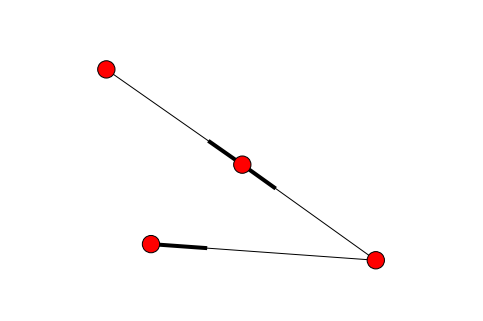

In [31]:
import networkx as nx

%matplotlib inline

results = %cypher MATCH p = (:Person)-[:LIKES]->(:Drink) RETURN p

g = results.get_graph()

nx.draw(g)

In [32]:
g.nodes(data=True)

[(u'9', {u'age': 20, 'labels': [u'Person'], u'name': u'Drew'}),
 (u'10', {u'calories': 9000, 'labels': [u'Drink'], u'name': u'Mountain Dew'}),
 (u'11', {u'calories': 0, 'labels': [u'Drink'], u'name': u'Coke Zero'}),
 (u'8', {u'age': 24, 'labels': [u'Person'], u'name': u'Nicole'})]

## igraph

In [1]:
from py2neo import Graph as PGraph

In [2]:
from igraph import Graph as IGraph

In [3]:
neo4j = PGraph()

query = """
MATCH (person:Person)-[:LIKES]->(drink:Drink)
RETURN person.name, drink.name
"""

data = neo4j.cypher.execute(query)
data

   | person.name | drink.name  
---+-------------+--------------
 1 | Nicole      | Mountain Dew
 2 | Nicole      | Coke Zero   
 3 | Drew        | Mountain Dew

In [4]:
ig = IGraph.TupleList(data)

ig

In [5]:
best = ig.vs.select(_degree = ig.maxdegree())["name"]
best

[u'Nicole', u'Mountain Dew']

## graph3d

In [1]:
import graph3d

In [3]:
graph3d.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])

In [6]:
data = graph.cypher.execute("MATCH (n)-->(m) RETURN ID(n), ID(m)")
data = [tuple(x) for x in data]

graph3d.draw(data)